In [1]:
library(tseries)

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [39]:
data(Nile)

Descriptiva.
* Caudal anual

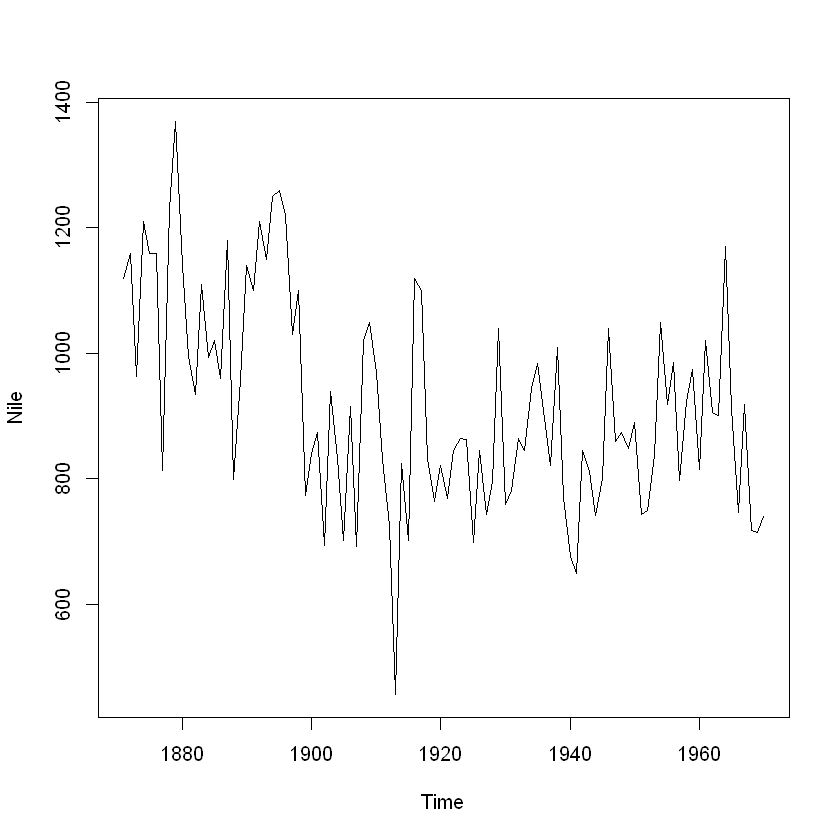

In [5]:
plot(Nile)

**Clasificación**
* Parecería que tiene tendencia

**Tendencia**

In [6]:
t<-lm(Nile~time(Nile))
summary(t)


Call:
lm(formula = Nile ~ time(Nile))

Residuals:
    Min      1Q  Median      3Q     Max 
-483.71  -98.17  -23.21  111.40  368.72 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6132.1736  1001.7578   6.121 1.92e-08 ***
time(Nile)    -2.7143     0.5216  -5.204 1.07e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 150.6 on 98 degrees of freedom
Multiple R-squared:  0.2165,	Adjusted R-squared:  0.2085 
F-statistic: 27.08 on 1 and 98 DF,  p-value: 1.072e-06


**NOTA**
p-valor chico y ajuste chico.
entonces si hay relación, pero el modelo no se ajusta a los datos.
Entonces habrá que buscar otro modelo

**Tendencia cuadrática**


Call:
lm(formula = Nile ~ poly(tiempo, degree = 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-425.71  -88.17    2.16   80.79  289.67 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 919.35      14.04  65.485  < 2e-16 ***
poly(tiempo, degree = 2)1  -783.51     140.39  -5.581 2.17e-07 ***
poly(tiempo, degree = 2)2   556.25     140.39   3.962 0.000142 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 140.4 on 97 degrees of freedom
Multiple R-squared:  0.3257,	Adjusted R-squared:  0.3118 
F-statistic: 23.42 on 2 and 97 DF,  p-value: 5.018e-09


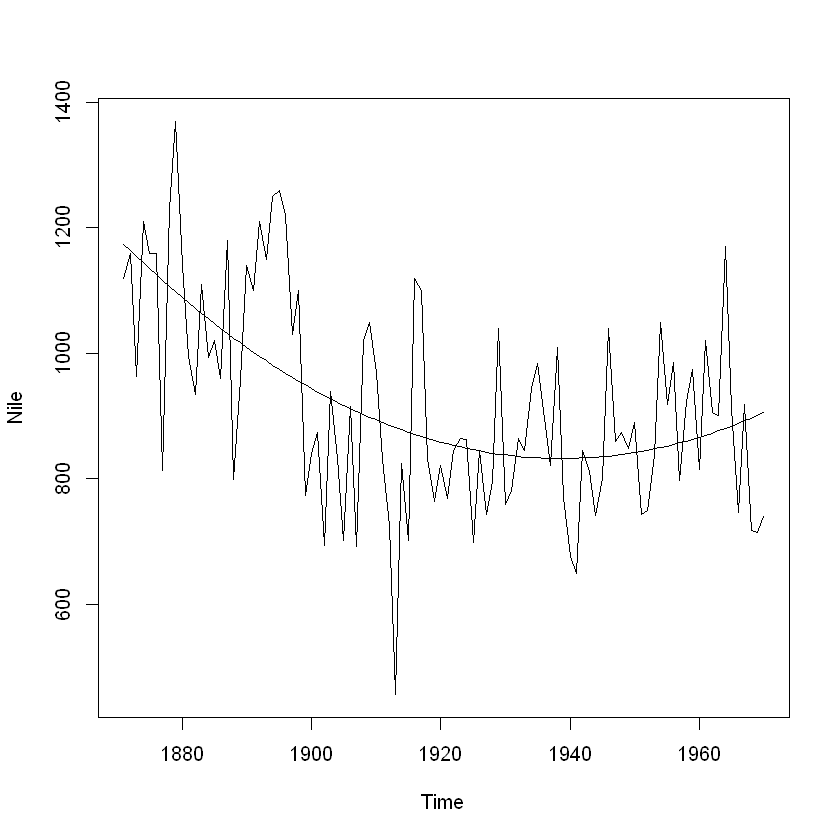

In [8]:
tiempo<-as.numeric(time(Nile))
c<-lm(Nile~poly(tiempo, degree=2))
summary(c)
plot(Nile)
lines(tiempo, fitted.values(c))

**Tendencia exponencial**

In [9]:
y.<-log(Nile)
lineal.asoc<-lm(y.~time(Nile))
summary(lineal.asoc)


Call:
lm(formula = y. ~ time(Nile))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70502 -0.10285 -0.00802  0.12473  0.37837 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.1211655  1.1224124  10.799  < 2e-16 ***
time(Nile)  -0.0027672  0.0005844  -4.735 7.38e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1687 on 98 degrees of freedom
Multiple R-squared:  0.1862,	Adjusted R-squared:  0.1779 
F-statistic: 22.42 on 1 and 98 DF,  p-value: 7.382e-06


In [13]:
coefficients(lineal.asoc)[1]
expon<-exp(coefficients(lineal.asoc)[1])*exp(coefficients(lineal.asoc)[2]*tiempo)

(Intercept) 
   12.12117

Calculando y gorro del modelo exponencial

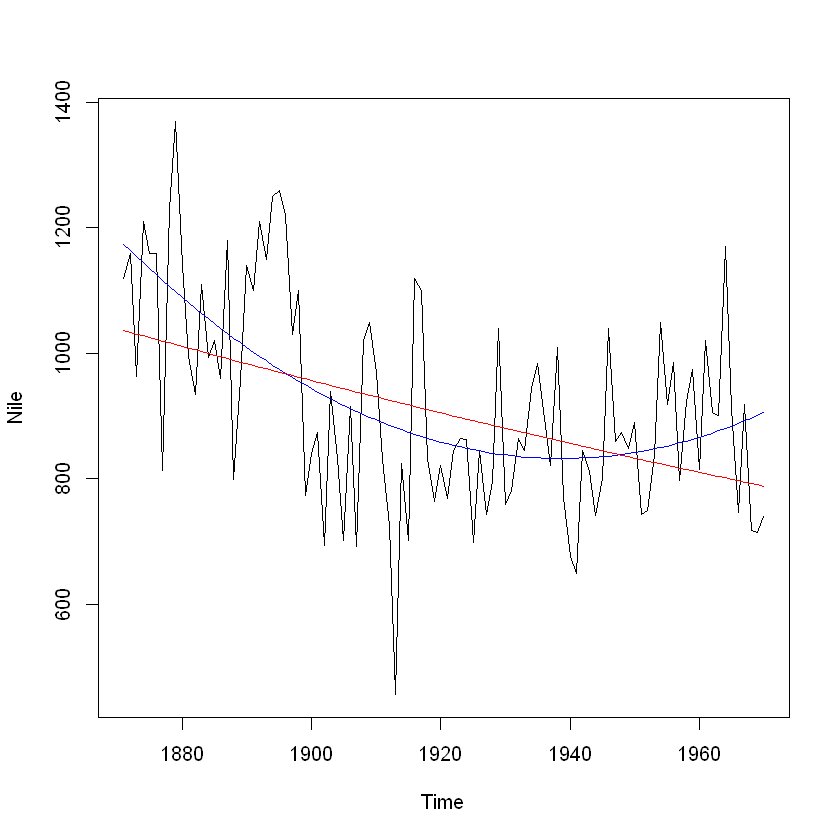

In [15]:
plot(Nile)
lines(tiempo, fitted.values(c), col="blue")
lines(tiempo, expon, col="red")

Modelo cuadrático para la tendencia, quizás no se ajuste pero es el que más se acerca de los que probamos

**Varianza**

In [16]:
adf.test(Nile, alternative="stationary")


	Augmented Dickey-Fuller Test

data:  Nile
Dickey-Fuller = -3.3657, Lag order = 4, p-value = 0.0642
alternative hypothesis: stationary


La serie de tiempo NO es estacionaria

## Clasificación de la serie

La serie No es estacionaria
Ni en media ni en varianza.
Correción respecto a media y varianza

## Corrección 1

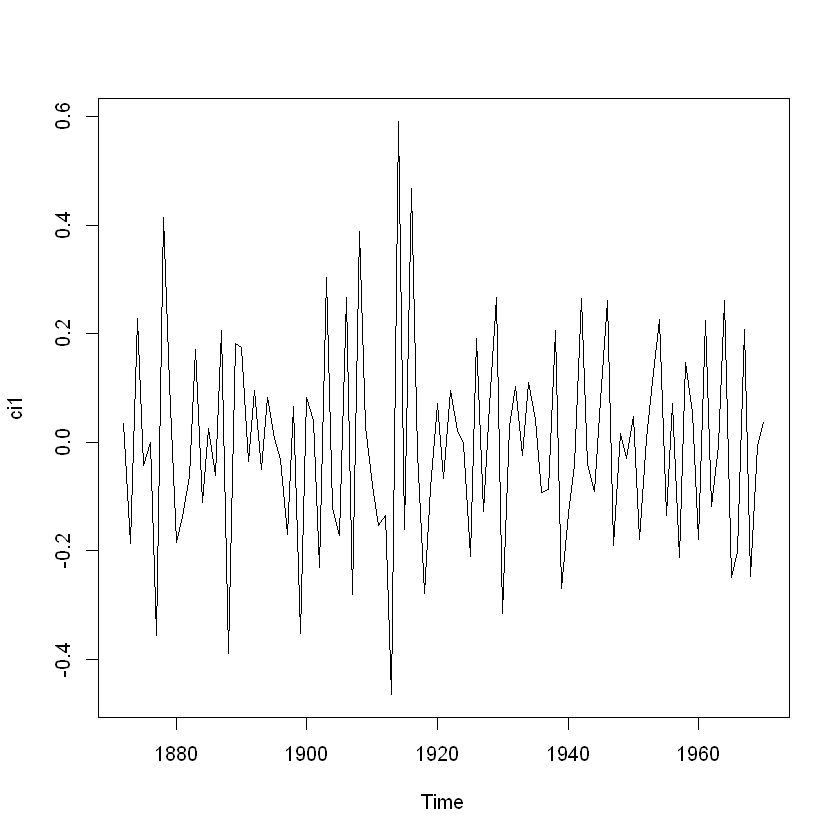

In [17]:
ci1<-diff(log(Nile))
plot(ci1)

Revisemos la correción

In [ ]:
**Media**

In [18]:
c1<-lm(ci1~time(ci1))
summary(c1)


Call:
lm(formula = ci1 ~ time(ci1))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46080 -0.13064 -0.00172  0.10300  0.59593 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.108e-02  1.302e+00  -0.016    0.987
time(ci1)    8.794e-06  6.777e-04   0.013    0.990

Residual standard error: 0.1927 on 97 degrees of freedom
Multiple R-squared:  1.736e-06,	Adjusted R-squared:  -0.01031 
F-statistic: 0.0001684 on 1 and 97 DF,  p-value: 0.9897


No rechazo Ho, no hay evidencia de asociaciión de variables, si tendencia

**Varianza**

In [21]:
adf.test(ci1, alternative="stationary")

Warning message in adf.test(ci1, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  ci1
Dickey-Fuller = -7.1644, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


La seie es estacionaria
La serie corregida es estacionaria

**Autocorrelogramas**

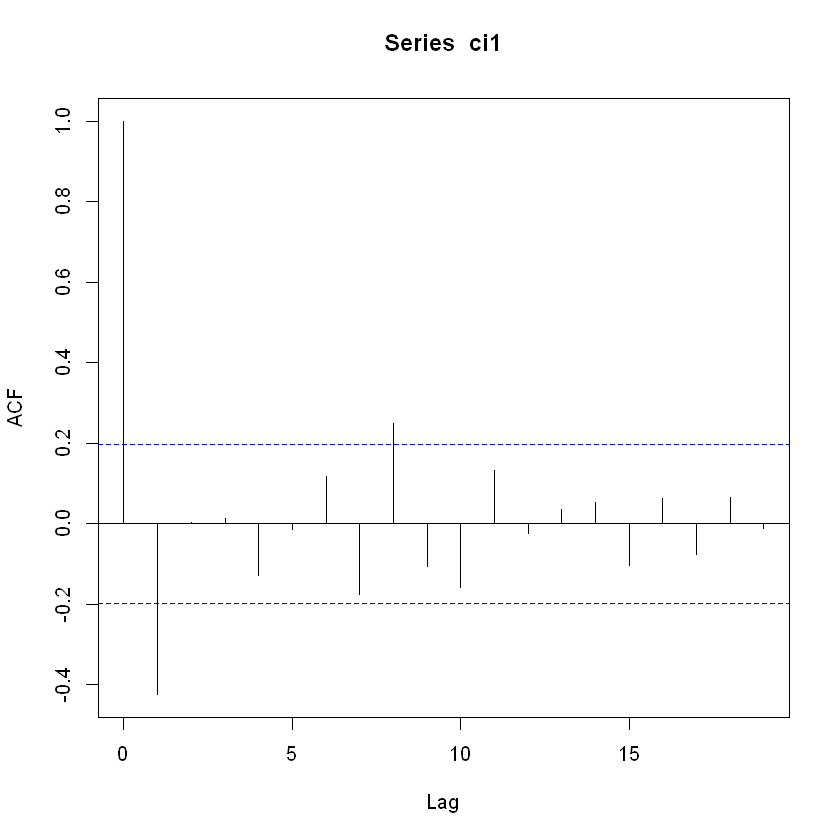

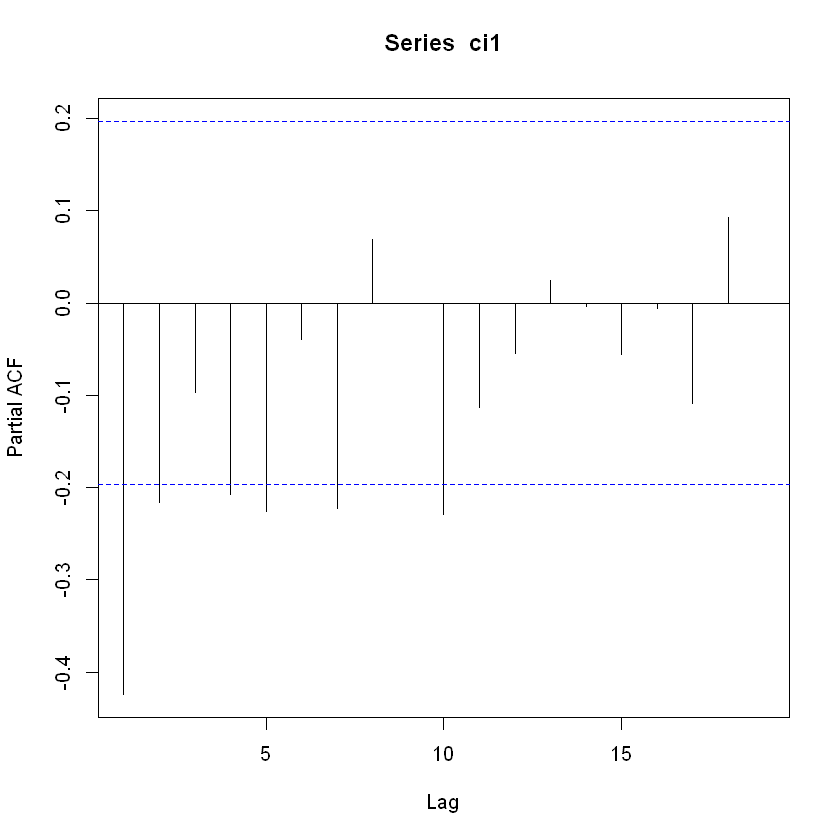

In [22]:
acf(ci1)
pacf(ci1)

## Modelado

**AR**

In [23]:
ar(ci1)


Call:
ar(x = ci1)

Coefficients:
      1        2        3        4        5        6        7  
-0.6214  -0.4367  -0.3690  -0.4125  -0.3346  -0.1761  -0.2230  

Order selected 7  sigma^2 estimated as  0.02641

In [25]:
AIC(arima(ci1, order=c(7,0,0), method="ML"))

[1] -69.16186

**MA**

In [26]:
aic0<-Inf # le das un numero muy grande
for (i in 1:10)
{
  aic1<-AIC(arima(ci1, order = c(0,0,i), method ="ML" ))
  if(aic1<aic0)
  {
    aic0<-aic1
    MA.mejor<-i
  }
}
aic0 
MA.mejor

[1] -74.72927

[1] 2

In [28]:
AIC(arima(ci1, order=c(0,0,2), method="ML"))

[1] -74.72927

In [29]:
arma.aic<-Inf
for(j in 1:10)
{
  for (i in 1:10)
  {
    aux<-AIC(arima(ci1, order = c(j,0,i), method ="ML" ))
    if(aux<arma.aic)
    {
      arma.aic<-aux
      ARMA.mejor<-c(j,i)
    }
  }
}
arma.aic
ARMA.mejor 

Warning message in arima(ci1, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"Warning message in arima(ci1, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"Warning message in arima(ci1, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"Warning message in arima(ci1, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"Warning message in arima(ci1, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"Se han producido NaNs"Warning message in arima(ci1, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han produci

[1] -75.67146

[1] 1 1

In [30]:
AIC(arima(ci1, order=c(1,0,1), method="ML"))

[1] -75.67146

## Ruido blanco

In [31]:
res<-residuals(arima(ci1, order=c(1,0,1)))

## Media

In [32]:
mean(res)

[1] -0.0008501321

## Varianza

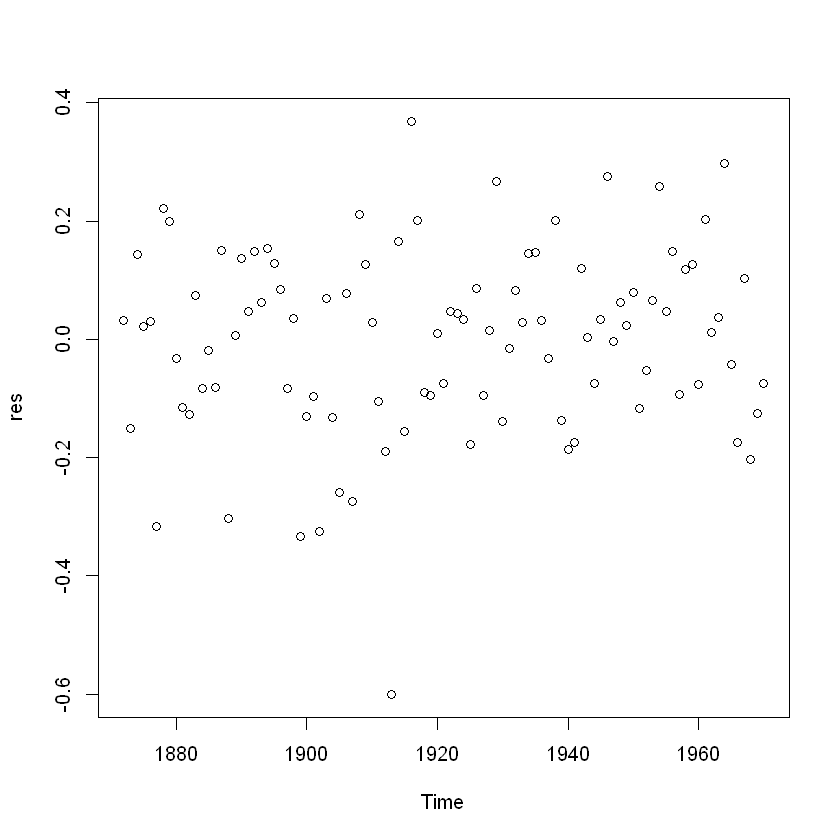

In [33]:
plot(res, type="p")

## incorrelación

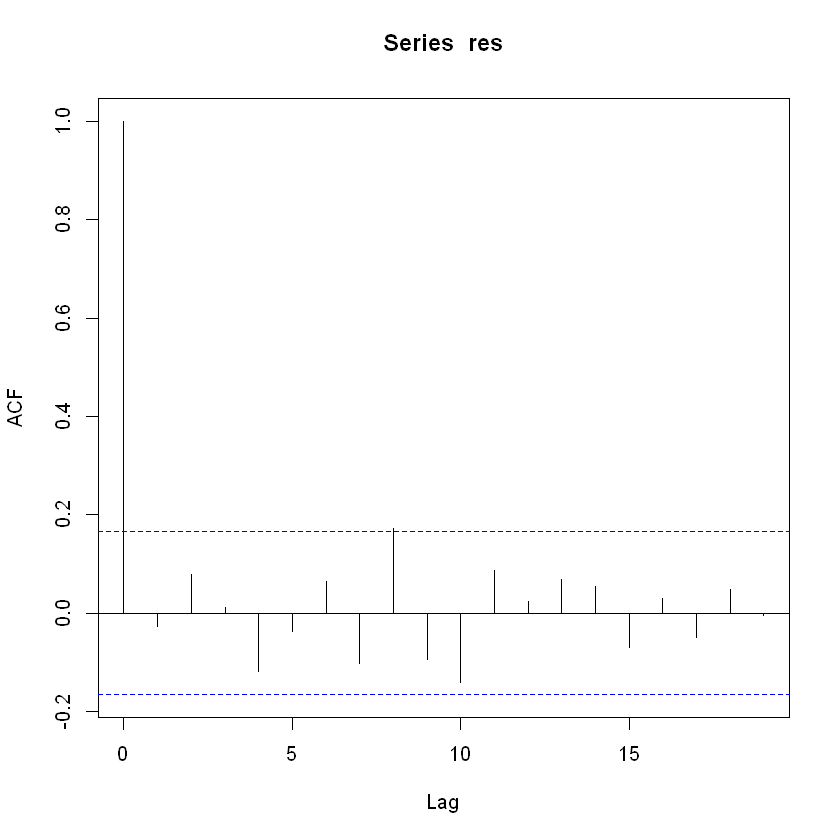

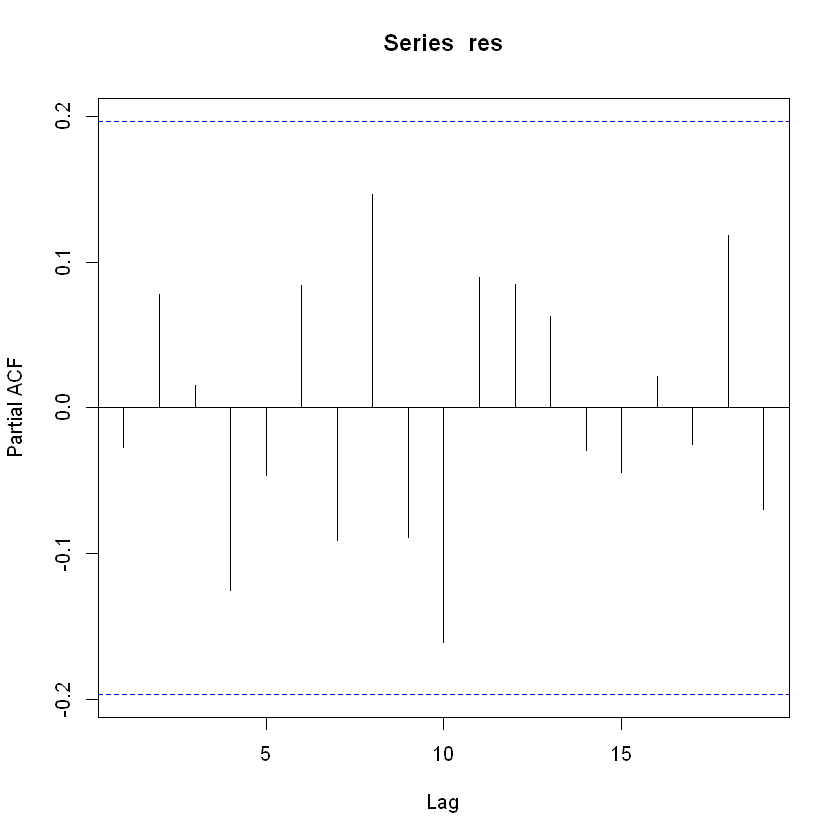

In [37]:
acf(res, ci=.90) #Cambia intervalo de  confianza
pacf(res) 

**Incorrelación forma analítica**

In [35]:
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 0.071152, df = 1, p-value = 0.7897


No se rechaza Ho, porque el p-valor es mayor que alfa, por lo que los residuales estan incorrelacionados, es decir, muestran independencia.

**Normalidad**

In [36]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.97677, p-value = 0.07709


Para un intervalo de confianza del 95% y 99%, es normal

Los residuales proceso de ruido blanco gaussiano

## Prediciones

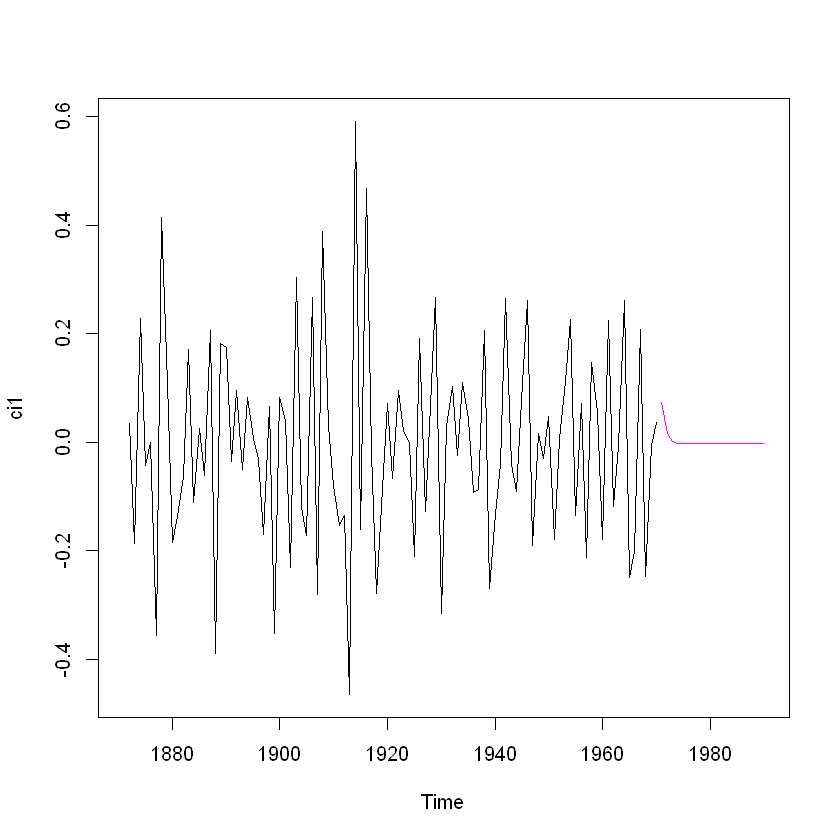

In [46]:
p<-predict(arima(ci1, order=c(1, 0,1), method="ML"), n.ahead=20)$pred
plot(ci1, xlim=c(1871, 1990))
lines(p, col="magenta")

In [48]:
print(p)

Time Series:
Start = 1971 
End = 1990 
Frequency = 1 
 [1]  0.074295353  0.016322162  0.001832248 -0.001789385 -0.002694581
 [6] -0.002920828 -0.002977376 -0.002991510 -0.002995042 -0.002995925
[11] -0.002996146 -0.002996201 -0.002996215 -0.002996219 -0.002996219
[16] -0.002996220 -0.002996220 -0.002996220 -0.002996220 -0.002996220
